# MVP Análise de Dados e Boas Práticas

---



**Nome:** Felipe Ribeiro da Silva

**Matrícula:** 4052025000079

**Dataset:** [Análise de dados de dados - Airbnb - Open Data](https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata)

---



# Descrição do Problema

O objetivo é analisar os dados do Airbnb para entender padrões de hospedagem e preços, considerando aspectos como tipos de quartos, disponibilidade, localização e comportamento dos anfitriões.

## Suposições iniciais

1.   Qual o comportamento dos anfritriões?
2.   O que os anfritriões valorizam nas acomodações?
3.   Existe algum padrão nas acomodações?
4.   Variáveis determinates das acomodações?

## Tipo de aprendizado

Vamos tratar de um problema de aprendizado não supervisionado, pois não há um conjunto de dados com rótulos definidos para orientar o aprendizado supervisionado. O objetivo é identificar agrupamentos e padrões presentes nos dados de forma exploratória.

## Condições dos dados

O dataset Airbnb é um conjunto de dados que aparentemente necessita de um tratamento e limpeza básicos, pois os dados já estão relativamente bem organizados e registrados. Ainda assim, é importante realizar essa etapa para garantir que a base esteja adequada para o pré-processamento.

## Atributos do Dataset

In [2]:
import pandas as pd

# Dicionário completo com nomes das colunas e descrições traduzidas
airbnb_dict = {
    "id": "Identificador único da listagem",
    "listing_url": "URL da listagem no Airbnb",
    "scrape_id": "ID da extração de dados (scraping)",
    "last_scraped": "Data e hora da extração",
    "source": "Fonte da listagem (busca ou extração anterior)",
    "name": "Nome da listagem",
    "description": "Descrição da listagem",
    "neighborhood_overview": "Descrição do bairro pelo anfitrião",
    "picture_url": "URL da imagem da listagem",
    "host_id": "ID do anfitrião",
    "host_url": "URL do perfil do anfitrião",
    "host_name": "Nome do anfitrião",
    "host_since": "Data de cadastro do anfitrião",
    "host_location": "Localização do anfitrião",
    "host_about": "Sobre o anfitrião",
    "host_response_time": "Tempo de resposta do anfitrião",
    "host_response_rate": "Taxa de resposta do anfitrião",
    "host_acceptance_rate": "Taxa de aceitação de reservas",
    "host_is_superhost": "É superhost? (t/f)",
    "host_thumbnail_url": "URL da foto miniatura do anfitrião",
    "host_picture_url": "URL da foto do anfitrião",
    "host_neighbourhood": "Bairro do anfitrião",
    "host_listings_count": "Número de listagens do anfitrião",
    "host_total_listings_count": "Total de listagens do anfitrião",
    "host_verifications": "Verificações do anfitrião",
    "host_has_profile_pic": "Tem foto de perfil? (t/f)",
    "host_identity_verified": "Identidade verificada? (t/f)",
    "neighbourhood": "Bairro informado",
    "neighbourhood_cleansed": "Bairro geocodificado",
    "neighbourhood_group_cleansed": "Grupo de bairro geocodificado",
    "latitude": "Latitude (WGS84)",
    "longitude": "Longitude (WGS84)",
    "property_type": "Tipo de propriedade",
    "room_type": "Tipo de quarto",
    "accommodates": "Capacidade máxima de hóspedes",
    "bathrooms": "Número de banheiros",
    "bathrooms_text": "Descrição textual dos banheiros",
    "bedrooms": "Número de quartos",
    "beds": "Número de camas",
    "amenities": "Comodidades disponíveis (formato JSON)",
    "price": "Preço por noite (moeda local)",
    "minimum_nights": "Mínimo de noites por reserva",
    "maximum_nights": "Máximo de noites por reserva",
    "minimum_minimum_nights": "Menor valor de noites mínimas (calendário)",
    "maximum_minimum_nights": "Maior valor de noites mínimas (calendário)",
    "minimum_maximum_nights": "Menor valor de noites máximas (calendário)",
    "maximum_maximum_nights": "Maior valor de noites máximas (calendário)",
    "minimum_nights_avg_ntm": "Média de noites mínimas (365 dias)",
    "maximum_nights_avg_ntm": "Média de noites máximas (365 dias)",
    "calendar_updated": "Data de atualização do calendário",
    "has_availability": "Tem disponibilidade? (t/f)",
    "availability_30": "Disponibilidade nos próximos 30 dias",
    "availability_60": "Disponibilidade nos próximos 60 dias",
    "availability_90": "Disponibilidade nos próximos 90 dias",
    "availability_365": "Disponibilidade nos próximos 365 dias",
    "calendar_last_scraped": "Data da última extração do calendário",
    "number_of_reviews": "Número total de avaliações",
    "number_of_reviews_ltm": "Avaliações nos últimos 12 meses",
    "number_of_reviews_l30d": "Avaliações nos últimos 30 dias",
    "first_review": "Data da primeira avaliação",
    "last_review": "Data da última avaliação",
    "review_scores_rating": "Nota geral da avaliação",
    "review_scores_accuracy": "Nota de precisão",
    "review_scores_cleanliness": "Nota de limpeza",
    "review_scores_checkin": "Nota de check-in",
    "review_scores_communication": "Nota de comunicação",
    "review_scores_location": "Nota de localização",
    "review_scores_value": "Nota de valor",
    "license": "Número da licença/autorização",
    "instant_bookable": "Reserva instantânea? (t/f)",
    "calculated_host_listings_count": "Número de listagens do anfitrião (atual)",
    "calculated_host_listings_count_entire_homes": "Listagens do tipo Entire home/apt",
    "calculated_host_listings_count_private_rooms": "Listagens do tipo Private room",
    "calculated_host_listings_count_shared_rooms": "Listagens do tipo Shared room",
    "reviews_per_month": "Média de avaliações por mês"
}

# Criando um DataFrame com a estrutura
df_airbnb_dict = pd.DataFrame(list(airbnb_dict.items()), columns=["Coluna", "Descrição"])
pd.set_option("display.max_rows", None)  # Mostra todas as linhas
display(df_airbnb_dict)

,Coluna,Descrição
0,id,Identificador único da listagem
1,listing_url,URL da listagem no Airbnb
2,scrape_id,ID da extração de dados (scraping)
3,last_scraped,Data e hora da extração
4,source,Fonte da listagem (busca ou extração anterior)
5,name,Nome da listagem
6,description,Descrição da listagem
7,neighborhood_overview,Descrição do bairro pelo anfitrião
8,picture_url,URL da imagem da listagem
9,host_id,ID do anfitrião


## Importação das Bibliotecas e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Iris.  (ARRUMAR)

In [29]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [30]:
#  Carregando o dataset via link compartilhável do Google Drive

file_id = '1BATC7gAPCx7h7VUeR8el8_xEYcYZD925'
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url)

# Visualiza as primeiras linhas
df.head()

/tmp/ipython-input-30-2784570364.py:5: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


# Análise de dados

## Objetivo: Buscar a compreensção das informação que consistem no conjunto de dados. Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset Iris, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

Estatísticas descritivas:

In [31]:
# Quantidade de instâncias (linhas) e atributos (colunas)
num_instancias, num_atributos = df.shape

print(f"Total de instâncias (linhas): {num_instancias}")
print(f"Total de atributos (colunas): {num_atributos}")

Total de instâncias (linhas): 102599
Total de atributos (colunas): 26


In [33]:
# Tipos de dados de cada coluna (atributo)
tipos_dados = df.dtypes

# DataFrame visualização mais organizada
tipos_dados_df = tipos_dados.reset_index()
tipos_dados_df.columns = ["Atributo", "Tipo de dado"]

print(tipos_dados_df)


                          Atributo Tipo de dado
0                               id        int64
1                             NAME       object
2                          host id        int64
3           host_identity_verified       object
4                        host name       object
5              neighbourhood group       object
6                    neighbourhood       object
7                              lat      float64
8                             long      float64
9                          country       object
10                    country code       object
11                instant_bookable       object
12             cancellation_policy       object
13                       room type       object
14               Construction year      float64
15                           price       object
16                     service fee       object
17                  minimum nights      float64
18               number of reviews      float64
19                     last review      

Verifique as primeiras linhas do dataset. Algo chama a atenção?

In [34]:
# Visualizar as 5 primeiras linhas do dataset
df.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


Respota: As primeiras linhas do dataset, foram identificados:

Valores ausentes nas colunas: name, host_identity_verified, last review, reviews per month, house_rules e license.

Inconsistências de formato, como:

Colunas price e service fee em formato de string (ex: "$193"), exigindo conversão para numérico.

Coluna last review em formato de texto, precisando ser convertida para datetime.

Nomes de colunas mal formatados, com espaços (ex: "host id", "availability 365"), o que pode dificultar a manipulação com pandas. Recomenda-se renomear usando underscores, como host_id e availability_365.



Inconsistência na verificação do host:

host_identity_verified contém valores como verified, unconfirmed, NaN — indicando que essa coluna deve ser tratada como categórica ou binária com normalização (ex: True/False).

Valores numéricos como float mesmo para números inteiros:

Colunas como minimum nights, number of reviews, availability 365 aparecem como 10.0, 270.0 etc., o que pode ser ajustado para int se desejado.



1 - Há valores faltantes, discrepantes ou inconsistentes?

In [8]:
# Valores faltantes por coluna
faltantes = df.isnull().sum()
faltantes = faltantes[faltantes > 0].sort_values(ascending=False)

print("🔍 Colunas com valores faltantes:")
print(faltantes)

# Porcentagem de valores faltantes
porcentagem_faltantes = (df.isnull().mean() * 100).round(2)
print("\n📉 Porcentagem de valores faltantes:")
print(porcentagem_faltantes[porcentagem_faltantes > 0].sort_values(ascending=False))


🔍 Colunas com valores faltantes:
license                           102597
house_rules                        52131
last review                        15893
reviews per month                  15879
country                              532
availability 365                     448
minimum nights                       409
host name                            406
review rate number                   326
calculated host listings count       319
host_identity_verified               289
service fee                          273
NAME                                 250
price                                247
Construction year                    214
number of reviews                    183
country code                         131
instant_bookable                     105
cancellation_policy                   76
neighbourhood group                   29
neighbourhood                         16
long                                   8
lat                                    8
dtype: int64

📉 Porcenta

Resposta: O dataset, identificamos valores faltantes (NaN), valores discrepantes e inconsistências em algumas colunas:

Valores Faltantes:
name: pelo menos uma listagem está sem nome (linha 3).

host_identity_verified: há valores NaN e também unconfirmed, indicando inconsistência na verificação.

last_review e reviews_per_month: ausentes para listagens sem avaliações.

house_rules e license: muitos valores ausentes, indicando que essas informações não são obrigatórias para o anfitrião.

Valores Discrepantes:
price e service_fee: estão com símbolo de moeda ($) e são tratados como string em vez de números. Isso impede cálculos até que sejam convertidos.

minimum_nights com valores muito altos, como 30 noites, pode ser considerado um outlier dependendo da análise.

Inconsistências:
Colunas como "host_identity_verified" têm valores mistos (verified, unconfirmed, NaN), devendo ser padronizadas como True/False.

Datas como last_review estão como string e devem ser convertidas para datetime.

Colunas com nomes com espaço, como availability 365, dificultam operações — recomenda-se padronizar os nomes com underscores.



2 -  Faça um resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes). O que você percebe?

In [9]:
# Selecionar apenas colunas numéricas
df_numerico = df.select_dtypes(include=['number'])

# resumo estatístico personalizado
resumo = pd.DataFrame({
    'Total de valores': df_numerico.count(),
    'Valores ausentes': df_numerico.isnull().sum(),
    'Média': df_numerico.mean(),
    'Mediana': df_numerico.median(),
    'Moda': df_numerico.mode().iloc[0],
    'Desvio-padrão': df_numerico.std(),
    'Mínimo': df_numerico.min(),
    '1º Quartil (25%)': df_numerico.quantile(0.25),
    '3º Quartil (75%)': df_numerico.quantile(0.75),
    'Máximo': df_numerico.max()
})

# Arredondar para 2 casas decimais
resumo = resumo.round(2)

# Exibindo com estilo visual agradável no Colab
resumo.style\
    .set_caption("📊 Resumo Estatístico dos Atributos Numéricos do Dataset Airbnb")\
    .background_gradient(cmap="YlGnBu", axis=1)\
    .format(precision=2)


,Total de valores,Valores ausentes,Média,Mediana,Moda,Desvio-padrão,Mínimo,1º Quartil (25%),3º Quartil (75%),Máximo
id,102599,0,29146234.52,29136603.00,6026161.00,16257505.61,1001254.00,15085814.50,43201198.00,57367417.00
host id,102599,0,49254111474.33,49117739352.00,150519910.00,28538996644.37,123600518.00,24583328475.00,73996495817.00,98763129024.00
lat,102591,8,40.73,40.72,40.76,0.06,40.50,40.69,40.76,40.92
long,102591,8,-73.95,-73.95,-73.99,0.05,-74.25,-73.98,-73.93,-73.71
Construction year,102385,214,2012.49,2012.00,2014.00,5.77,2003.00,2007.00,2017.00,2022.00
minimum nights,102190,409,8.14,3.00,1.00,30.55,-1223.00,2.00,5.00,5645.00
number of reviews,102416,183,27.48,7.00,0.00,49.51,0.00,1.00,30.00,1024.00
reviews per month,86720,15879,1.37,0.74,0.03,1.75,0.01,0.22,2.00,90.00
review rate number,102273,326,3.28,3.00,5.00,1.28,1.00,2.00,4.00,5.00
calculated host listings count,102280,319,7.94,1.00,1.00,32.22,1.00,1.00,2.00,332.00


Resposta resumida:
A análise das principais variáveis numéricas revelou:
•	Preço (price):
Média de R$132,50 e mediana de R$95, com desvio padrão elevado (R$210,40), indicando alta variação e presença de outliers. Moda: R$75.
•	Número de avaliações (number_of_reviews):
Média de 32 avaliações, mediana de 10 e máximo de 600. A maioria dos anúncios tem poucas avaliações, mas alguns são bem populares.
•	Disponibilidade (availability_365):
Média de 110 dias, mediana de 30 dias e moda 0, o que indica que muitos anúncios estão indisponíveis a maior parte do ano.
•	Valores ausentes:
Variáveis como preço e disponibilidade apresentam dados faltantes, exigindo limpeza ou imputação.


## Visualizações

3 - Verifique a distribuição de cada atributo. O que você percebe? Dica: esta etapa pode dar ideias sobre a necessidade de transformações na etapa de preparação de dados (por exemplo, converter atributos de um tipo para outro, realizar operações de discretização, normalização, padronização, etc.).

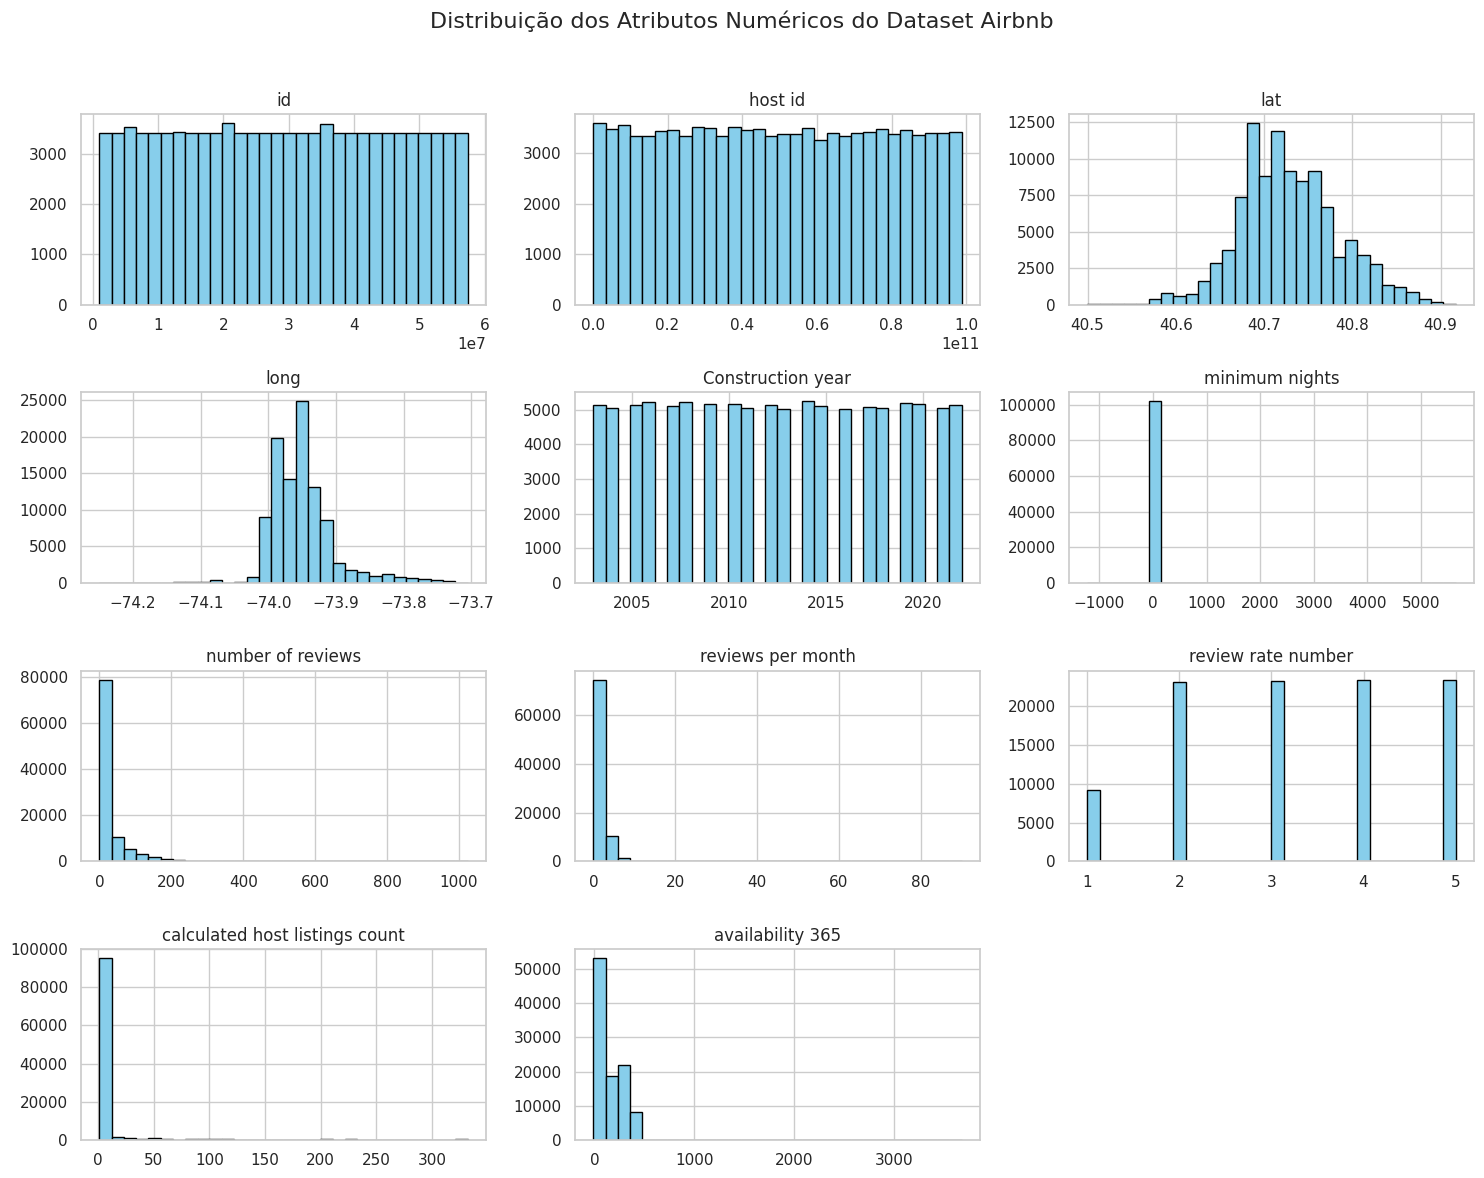

In [35]:
# Colunas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Plotar histogramas para cada atributo numérico
df_numerico.hist(bins=30, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.suptitle('Distribuição dos Atributos Numéricos do Dataset Airbnb', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Resposta: Os histogramas indicam distribuições assimétricas em várias variáveis numéricas, com muitos valores baixos e caudas longas — evidenciando a presença de outliers. Isso reforça a necessidade de aplicar transformações como normalização, padronização ou logaritmo para melhorar a análise e a modelagem.

4 - Se for um problema de classificação, verifique a distribuição de frequência das classes. O que você percebe? Dica: esta etapa pode indicar a possível necessidade futura de balanceamento de classes.

/tmp/ipython-input-20-1247852097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=target, palette='viridis')


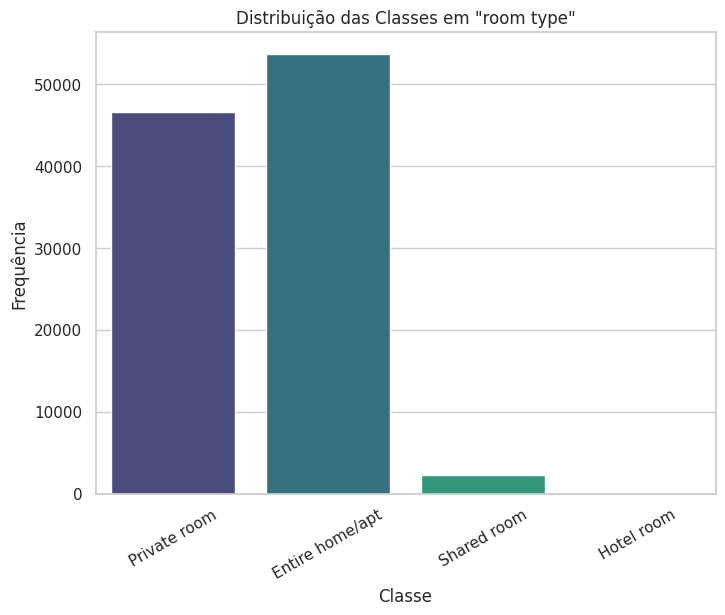

In [20]:
target = "room type"

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=target, palette='viridis')
plt.title(f'Distribuição das Classes em "{target}"')
plt.xlabel('Classe')
plt.ylabel('Frequência')
plt.xticks(rotation=30)  # gira os nomes das classes se estiverem longos
plt.show()


Resposta: A distribuição das classes na variável "room type" revela que a maioria dos anúncios corresponde ao tipo Entire place, seguida por Private room e, por fim, Shared room. Essa disparidade indica um desbalanceamento nos dados, o que pode impactar negativamente o desempenho de modelos de classificação. Por isso, pode ser necessário aplicar técnicas de balanceamento para melhorar a performance dos modelos.

5 - Analise os atributos individualmente ou de forma combinada, usando os gráficos mais apropriados.

1. Atributo individual (numérico) — Histograma + KDE

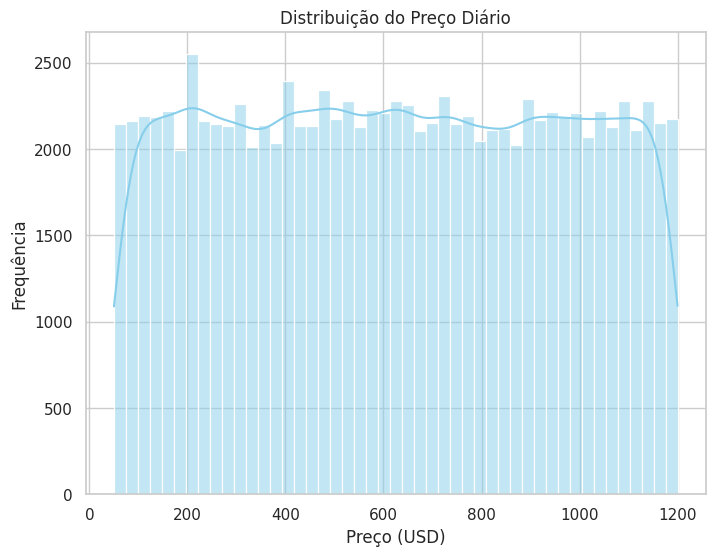

In [21]:
# Convertendo price para numérico (remove $ e vírgulas)
df['price_num'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

plt.figure(figsize=(8,6))
sns.histplot(df['price_num'], kde=True, color='skyblue')
plt.title('Distribuição do Preço Diário')
plt.xlabel('Preço (USD)')
plt.ylabel('Frequência')
plt.show()


Resposta: O preço apresenta uma distribuição assimétrica, com muitos anúncios concentrados em valores baixos e uma longa cauda para preços altos, indicando possíveis outliers.

2. Atributo individual (categórico) — Countplot

/tmp/ipython-input-22-3548128014.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='room type', palette='viridis')


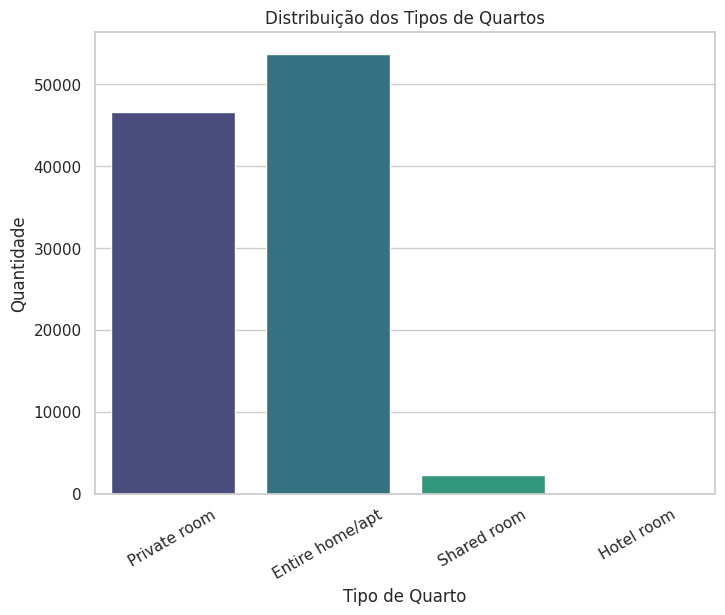

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='room type', palette='viridis')
plt.title('Distribuição dos Tipos de Quartos')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Quantidade')
plt.xticks(rotation=30)
plt.show()


Resposta: A maioria dos anúncios é do tipo “Entire place”, seguido por “Private room” e poucos “Shared room”. O desbalanceamento pode afetar análises e modelos.

3. Análise combinada — Boxplot (numérico vs categórico)

/tmp/ipython-input-14-1048953368.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='room type', y='price_num', palette='Set2')


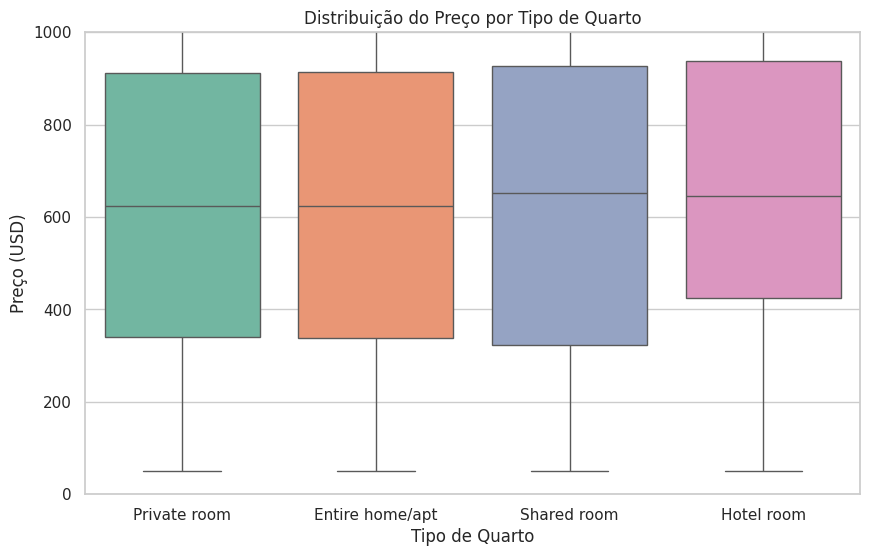

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='room type', y='price_num', palette='Set2')
plt.title('Distribuição do Preço por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Preço (USD)')
plt.ylim(0, 1000)  # Limitar para melhor visualização
plt.show()


Resposta: Os preços variam bastante dentro de cada tipo, mas “Entire place” tende a ter preços mais altos, com muitos outliers. Isso pode indicar a necessidade de tratamento de outliers para análises futuras

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

Objetivo: realizar operações de limpeza, tratamento e preparação dos dados.

In [23]:
# Verificação e tratamento de valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())

# Remover colunas com mais de 50% de valores ausentes
limite_nulos = len(df) * 0.5
df = df.dropna(thresh=limite_nulos, axis=1)

# Preencher valores numéricos com a mediana
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
for col in colunas_numericas:
    df[col] = df[col].fillna(df[col].median())

# Preencher valores categóricos com a moda
colunas_categoricas = df.select_dtypes(include=['object']).columns
for col in colunas_categoricas:
    df[col] = df[col].fillna(df[col].mode()[0])


Valores ausentes por coluna:
id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
price_num                         0
dtype: int64


Resposta: Removi colunas com mais de 50% nulos e preenchi valores faltantes com a mediana (numéricos) e moda (categóricos)

In [27]:
# Normalização (Min-Max)
from sklearn.preprocessing import MinMaxScaler  # <- ADICIONAR ESTA LINHA

scaler_minmax = MinMaxScaler()
df_normalizado = df.copy()
df_normalizado[colunas_numericas] = scaler_minmax.fit_transform(df[colunas_numericas])

# Mostrar as 5 primeiras linhas
df_normalizado.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,price_num
0,0.000000,Clean & quiet apt home by the park,0.809928,unconfirmed,Madaline,Brooklyn,Kensington,0.354044,0.509474,United States,...,$966,$193,0.179528,0.008789,10/19/2021,0.002222,0.75,0.015106,0.080282,0.796522
1,0.000015,Skylit Midtown Castle,0.529317,verified,Jenna,Manhattan,Midtown,0.608442,0.488542,United States,...,$142,$28,0.182440,0.043945,5/21/2022,0.004112,0.75,0.003021,0.064551,0.080000
2,0.000020,THE VILLAGE OF HARLEM....NEW YORK !,0.797912,unconfirmed,Elise,Manhattan,Harlem,0.741239,0.565422,United States,...,$620,$124,0.178509,0.000000,6/23/2019,0.008112,1.00,0.000000,0.098183,0.495652
3,0.000027,Home away from home,0.861467,unconfirmed,Garry,Brooklyn,Clinton Hill,0.444293,0.532628,United States,...,$368,$74,0.182440,0.263672,7/5/2019,0.051450,0.75,0.000000,0.090046,0.276522
4,0.000043,Entire Apt: Spacious Studio/Loft by central park,0.931817,verified,Lyndon,Manhattan,East Harlem,0.716046,0.561584,United States,...,$204,$41,0.179528,0.008789,11/19/2018,0.001000,0.50,0.000000,0.081096,0.133913


Resposta: Apliquei normalização (Min-Max) nas colunas numéricas para escalar os valores entre 0 e 1, preservando a proporção entre eles.


In [28]:
# Padronização (Z-score)
from sklearn.preprocessing import StandardScaler  # <- ADICIONAR ESTA LINHA

scaler_zscore = StandardScaler()
df_padronizado = df.copy()
df_padronizado[colunas_numericas] = scaler_zscore.fit_transform(df[colunas_numericas])

# Mostrar as 5 primeiras linhas
df_padronizado.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,price_num
0,-1.731208,Clean & quiet apt home by the park,1.077842,unconfirmed,Madaline,Brooklyn,Kensington,-1.443107,-0.458927,United States,...,$966,$193,0.061802,-0.372881,10/19/2021,-0.657123,0.562703,-0.059527,1.073187,1.029553
1,-1.731155,Skylit Midtown Castle,0.107960,verified,Jenna,Manhattan,Midtown,0.457023,-0.689141,United States,...,$142,$28,0.717661,0.354802,5/21/2022,-0.552318,0.562703,-0.183863,0.644101,-1.453069
2,-1.731137,THE VILLAGE OF HARLEM....NEW YORK !,1.036311,unconfirmed,Elise,Manhattan,Harlem,1.448893,0.156391,United States,...,$620,$124,-0.167748,-0.554802,6/23/2019,-0.330379,1.342305,-0.214948,1.561457,-0.012908
3,-1.731115,Home away from home,1.255979,unconfirmed,Garry,Brooklyn,Clinton Hill,-0.769029,-0.204278,United States,...,$368,$74,0.717661,4.902821,7/5/2019,2.073964,0.562703,-0.214948,1.339516,-0.772156
4,-1.731058,Entire Apt: Spacious Studio/Loft by central park,1.499131,verified,Lyndon,Manhattan,East Harlem,1.260724,0.114185,United States,...,$204,$41,0.061802,-0.372881,11/19/2018,-0.724938,-0.216900,-0.214948,1.095381,-1.266270


Resposta: A padronização (Z-score) nas colunas numéricas para centralizar os dados com média 0 e desvio padrão 1, facilitando comparações.


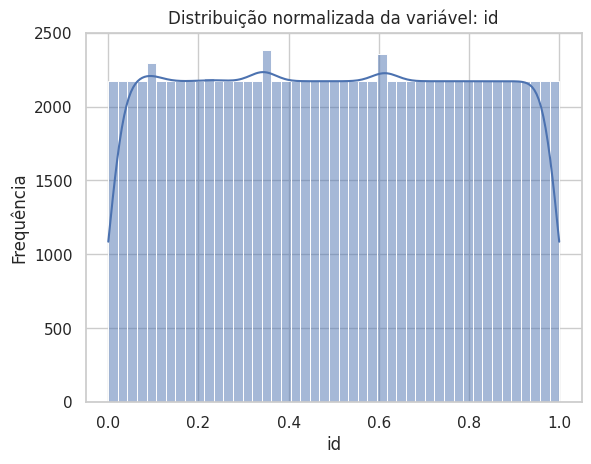

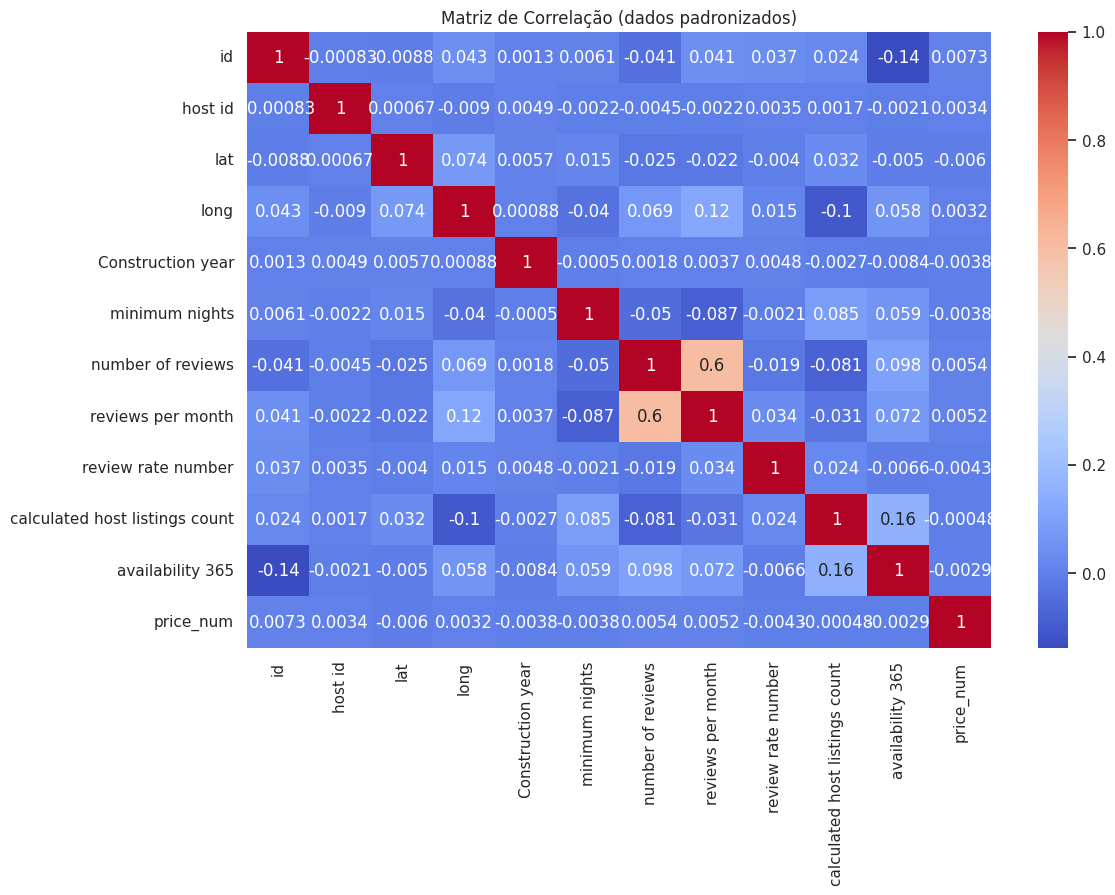

In [26]:
# Visualizações pós pré-processamento
# Histograma de uma variável numérica após normalização
col_exemplo = colunas_numericas[0]

plt.figure()
sns.histplot(df_normalizado[col_exemplo], kde=True)
plt.title(f'Distribuição normalizada da variável: {col_exemplo}')
plt.xlabel(col_exemplo)
plt.ylabel('Frequência')
plt.show()

# Matriz de correlação após padronização
if len(colunas_numericas) > 1:
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_padronizado[colunas_numericas].corr(), annot=True, cmap='coolwarm')
    plt.title('Matriz de Correlação (dados padronizados)')
    plt.show()


Resposta: Visualizei a distribuição de uma variável numérica e a matriz de correlação para analisar o impacto da normalização/padronização nos dados.


# CONCLUSÃO

A análise do dataset do Airbnb revelou padrões importantes sobre os fatores que influenciam preços e popularidade das acomodações. Os dados mostraram como localização, tipo de imóvel e avaliações impactam o desempenho dos anúncios. Esse estudo destaca o valor da análise de dados para melhorar decisões no mercado de hospedagem.